In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
sns.set()

In [6]:
df = pd.read_csv('Wholesale+Customers+Data.csv') ## load dataset

In [7]:
df_main = pd.read_csv('Wholesale+Customers+Data.csv') ## load dataset

In [8]:
df.head() ## top 5 rows

,Buyer,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


### EDA (Exploratory Data Analysis)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
Buyer               440 non-null int64
Channel             440 non-null object
Region              440 non-null object
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicatessen        440 non-null int64
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


In [10]:
df.Buyer = df.Buyer.astype('object') ## as buyer field is actually a categorical data. so convert buyer from int to object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
Buyer               440 non-null object
Channel             440 non-null object
Region              440 non-null object
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicatessen        440 non-null int64
dtypes: int64(6), object(3)
memory usage: 31.1+ KB


In [12]:
df.isnull().sum() ## check is there any null data in the dataset

Buyer               0
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

## 1.1. Use methods of descriptive statistics to summarize data.
### Which Region and which Channel seems to spend more?
### Which Region and which Channel seems to spend less?

#### Data Summary

In [13]:
df.describe().T ## this will help to summarise the dataset

,count,mean,std,min,25%,50%,75%,max
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


Describe function is very useful to summarise the data. in this dataset we can see below observations:
    1. There are 440 total rows for this dataset.
    2. There are 6 numerical variables in the dataset which helps to summarise the trend
    3. Items: for all items, mean is greater than 50%(i.e. median), which stats we have skewness in these data.

------------------------------------------------DATA SUMMARY END---------------------------------------------------------------

#### Region and Channel with High spend and Low Spend

In [14]:
Total_spend = df.Fresh + df.Milk + df.Grocery + df.Frozen + df.Detergents_Paper + df.Delicatessen
## to get the total spend, add up all the items

In [15]:
df['Total_spend'] = Total_spend ## create new column in dataset and append total spend into dataset

In [16]:
R_C = df['Region'] + " - " + df['Channel']
## concate region and channel, to get easy reading and visualising the dataset

In [17]:
df['Region_Channel'] = R_C ## create new column in dataset and append region and channel into dataset

In [18]:
df.head() # view the head of the dataset where Total Spend and Region_Channel new columns are added

,Buyer,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total_spend,Region_Channel
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112,Other - Retail
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266,Other - Retail
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610,Other - Retail
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381,Other - Hotel
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100,Other - Retail


In [19]:
df_r = df.groupby(['Region']).sum()
df_r.style.format("{:,.0f}") 
## group by details by region & change the style to update the format (comma seperator)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total_spend
Region,,,,,,,
Lisbon,"854,833","422,454","570,037","231,026","204,136","104,327","2,386,813"
Oporto,"464,721","239,144","433,274","190,132","173,311","54,506","1,555,088"
Other,"3,960,577","1,888,759","2,495,251","930,492","890,410","512,110","10,677,599"


In [20]:
df_r[df_r['Total_spend'] == df_r['Total_spend'].max()].style.format("{:,.0f}")
## find the maximum total spend among region

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total_spend
Region,,,,,,,
Other,"3,960,577","1,888,759","2,495,251","930,492","890,410","512,110","10,677,599"


Region : Other has the highest total spend

In [21]:
df_r[df_r['Total_spend'] == df_r['Total_spend'].min()].style.format("{:,.0f}")
## find the minimum total spend among region

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total_spend
Region,,,,,,,
Oporto,"464,721","239,144","433,274","190,132","173,311","54,506","1,555,088"


Region : Oporto has the lowest total spend

In [22]:
df_c = df.groupby(['Channel']).sum()
df_c.style.format("{:,.0f}") 
## group by details by channel & change the style to update the format (comma seperator)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total_spend
Channel,,,,,,,
Hotel,"4,015,717","1,028,614","1,180,717","1,116,979","235,587","421,955","7,999,569"
Retail,"1,264,414","1,521,743","2,317,845","234,671","1,032,270","248,988","6,619,931"


In [23]:
df_c[df_c['Total_spend'] == df_c['Total_spend'].max()].style.format("{:,.0f}")
## find the maximum total spend among channel

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total_spend
Channel,,,,,,,
Hotel,"4,015,717","1,028,614","1,180,717","1,116,979","235,587","421,955","7,999,569"


Channel : Hotel has the highest total spend

In [24]:
df_c[df_c['Total_spend'] == df_c['Total_spend'].min()].style.format("{:,.0f}")
## find the minimum total spend among channel

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total_spend
Channel,,,,,,,
Retail,"1,264,414","1,521,743","2,317,845","234,671","1,032,270","248,988","6,619,931"


Channel : Retail has the lowest total spend

In [25]:
df1 = df.groupby(['Region_Channel']).sum()
df1.style.format("{:,.0f}")
## group by details by region and channel and changes the style format using comma seperator

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total_spend
Region_Channel,,,,,,,
Lisbon - Hotel,"761,233","228,342","237,542","184,512","56,081","70,632","1,538,342"
Lisbon - Retail,"93,600","194,112","332,495","46,514","148,055","33,695","848,471"
Oporto - Hotel,"326,215","64,519","123,074","160,861","13,516","30,965","719,150"
Oporto - Retail,"138,506","174,625","310,200","29,271","159,795","23,541","835,938"
Other - Hotel,"2,928,269","735,753","820,101","771,606","165,990","320,358","5,742,077"
Other - Retail,"1,032,308","1,153,006","1,675,150","158,886","724,420","191,752","4,935,522"


In [26]:
df1[df1['Total_spend'] == df1['Total_spend'].max()].style.format("{:,.0f}")
## find the maximum total spend among region and channel

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total_spend
Region_Channel,,,,,,,
Other - Hotel,"2,928,269","735,753","820,101","771,606","165,990","320,358","5,742,077"


Region and Channel : Region_Channel, other and hotel has the highest total spend for the period

In [27]:
df1[df1['Total_spend'] == df1['Total_spend'].min()].style.format("{:,.0f}")
## find the minimum total spend among region and channel

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total_spend
Region_Channel,,,,,,,
Oporto - Hotel,"326,215","64,519","123,074","160,861","13,516","30,965","719,150"


In [28]:
df2 = df.groupby(['Region_Channel']).sum().reset_index()
df2

,Region_Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total_spend
0,Lisbon - Hotel,761233,228342,237542,184512,56081,70632,1538342
1,Lisbon - Retail,93600,194112,332495,46514,148055,33695,848471
2,Oporto - Hotel,326215,64519,123074,160861,13516,30965,719150
3,Oporto - Retail,138506,174625,310200,29271,159795,23541,835938
4,Other - Hotel,2928269,735753,820101,771606,165990,320358,5742077
5,Other - Retail,1032308,1153006,1675150,158886,724420,191752,4935522


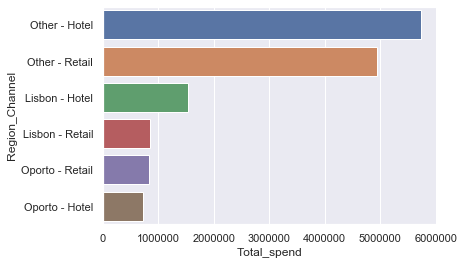

In [29]:
df2 = df.groupby(['Region_Channel']).sum().reset_index()
df_barplot = df2.sort_values('Total_spend', ascending = False)
a = sns.barplot(x ='Total_spend', y ='Region_Channel', data = df_barplot, ci = None)
##Barplot the visualisation we can use to get the region and channel has the higher and lower spend.

Region and Channel : Region_Channel, oporto and hotel has the lowest total spend for the period

Summary:

Highest Spend:
 1. Region : Other has the highest spend with amount of 10.7 million.
 2. Channel : Hotel has the highest spend with amount of 8 million.
 3. Region & Channel : When we combine region and channel OTHER & HOTEL has the highest spend with amount of 5.7 million.

Lowest Spend:
 1. Region : Oporto has the lowest spend with amount of 1.6 million.
 2. Channel : Retail has the lowest spend with amount of 6.6 million.
 3. Region & Channel : When we combine region and channel OPORTO & HOTEL has the lowest spend with amount of 0.7 million.

----------------------------------------REGION & CHANNEL : HIGHEST & LOWEST SPEND------------------------------------------

--------------------------------------------END OF PROBLEM 1.1-----------------------------------------------------

### 1.2. There are 6 different varieties of items are considered.
### Do all varieties show similar behaviour across Region and Channel?

In [30]:
df.head()

,Buyer,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total_spend,Region_Channel
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112,Other - Retail
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266,Other - Retail
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610,Other - Retail
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381,Other - Hotel
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100,Other - Retail


In [31]:
df1_2 = df[['Region','Channel','Region_Channel','Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']]
df1_2.head()

,Region,Channel,Region_Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,Other,Retail,Other - Retail,12669,9656,7561,214,2674,1338
1,Other,Retail,Other - Retail,7057,9810,9568,1762,3293,1776
2,Other,Retail,Other - Retail,6353,8808,7684,2405,3516,7844
3,Other,Hotel,Other - Hotel,13265,1196,4221,6404,507,1788
4,Other,Retail,Other - Retail,22615,5410,7198,3915,1777,5185


### Lets take down the spend behaviour of each items spend across regions

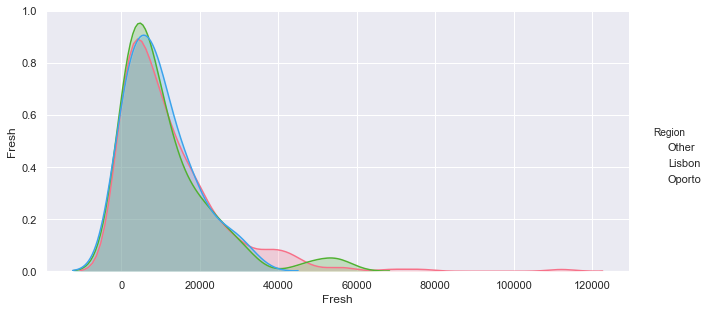

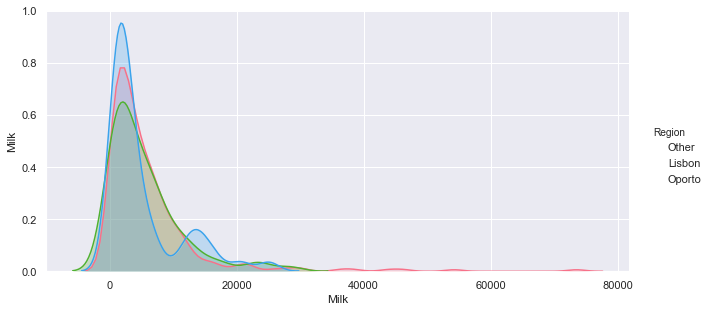

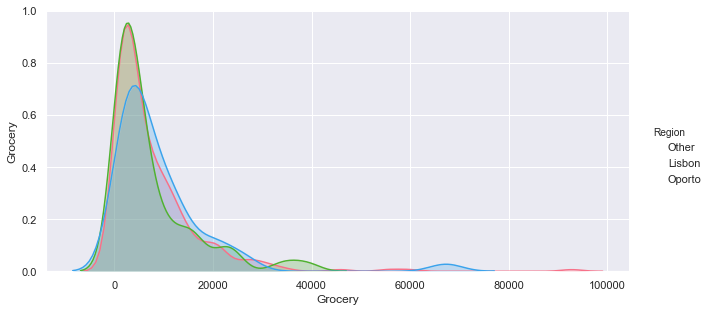

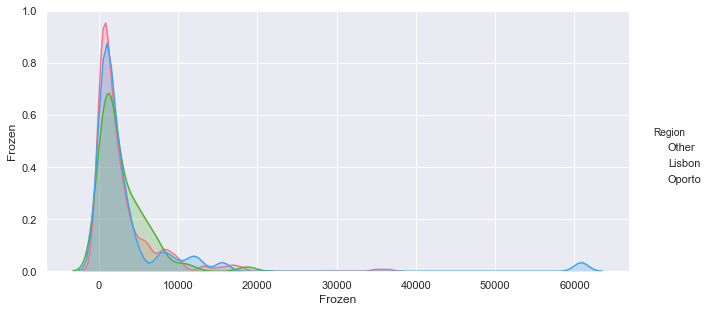

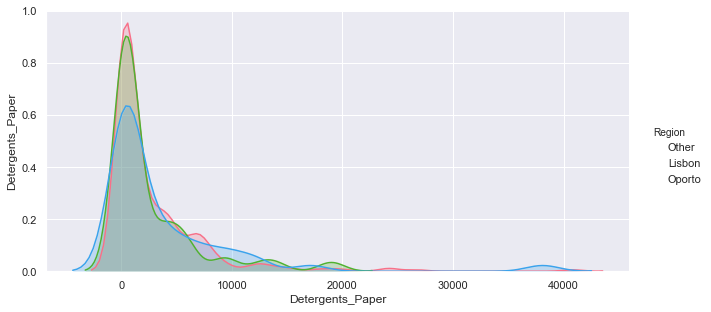

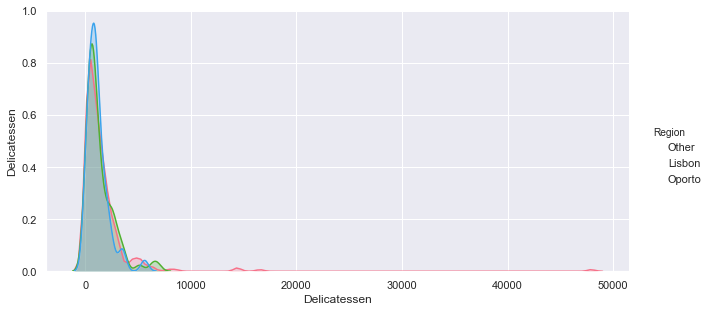

In [32]:
sns.pairplot(df1_2,hue = 'Region',x_vars=['Fresh'],y_vars=['Fresh'],height=4.5,aspect=2,palette='husl')
sns.pairplot(df1_2,hue = 'Region',x_vars=['Milk'],y_vars=['Milk'],height=4.5,aspect=2,palette='husl')
sns.pairplot(df1_2,hue = 'Region',x_vars=['Grocery'],y_vars=['Grocery'],height=4.5,aspect=2,palette='husl')
sns.pairplot(df1_2,hue = 'Region',x_vars=['Frozen'],y_vars=['Frozen'],height=4.5,aspect=2,palette='husl')
sns.pairplot(df1_2,hue = 'Region',x_vars=['Detergents_Paper'],y_vars=['Detergents_Paper'],height=4.5,aspect=2,palette='husl')
sns.pairplot(df1_2,hue = 'Region',x_vars=['Delicatessen'],y_vars=['Delicatessen'],height=4.5,aspect=2,palette='husl')

For Item Fresh behaviour across region: As we can see in the graph that most buyers are spending approx 10k. Hence, it can be concluded that item fresh displays similar behaviour across regions.

For Item Milk behaviour across region: As we can see in the graph that most buyers are spending across the region is varying from 6k to 10k.Hence, it can be concluded that the spending behaviour for item milk is not similar across regions.

For Item Grocery behaviour across region: As we can see in the graph that most buyers are spending across the region is varying from 7k to 10k.Hence, it can be concluded that the spending behaviour for item grocery is not similar across regions.

For Item Frozen behaviour across region: As we can see in the graph that most buyers are spending across the region is varying from 7k to 9k.Hence, it can be concluded that the spending behaviour for item frozen is not similar across regions.

For Item Detergents_paper behaviour across region: As we can see in the graph that most buyers are spending across the region is varying from 6k to 10k.Hence, it can be concluded that the spending behaviour for item Detergents_paper is not similar across regions.

For Item Delicatessen behaviour across region: As we can see in the graph that most buyers are spending approx 10k. Hence, it can be concluded that item Delicatessen displays similar behaviour across regions.

#### Conclusion: Item Fresh and Item Delicatessen shows similar behaviour across the regions whereas others fails to do so.

### Lets take down the spend behaviour of each items spend across channels

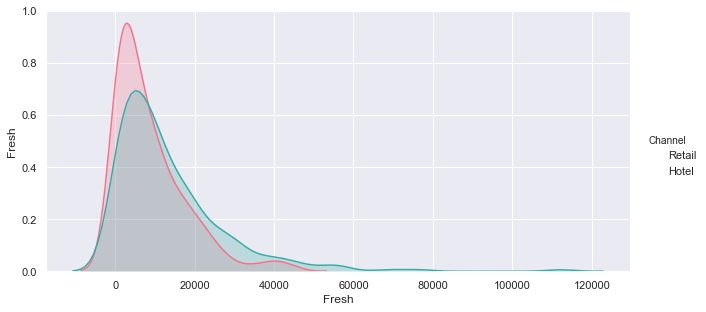

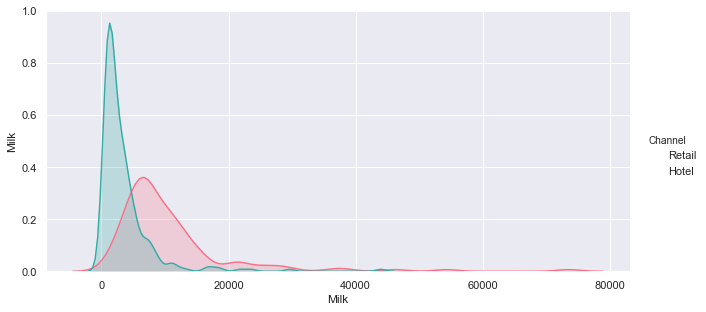

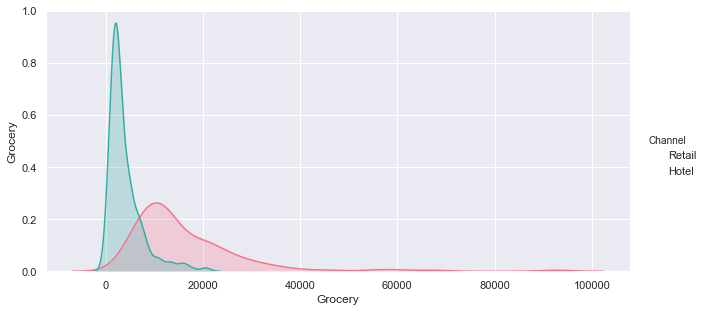

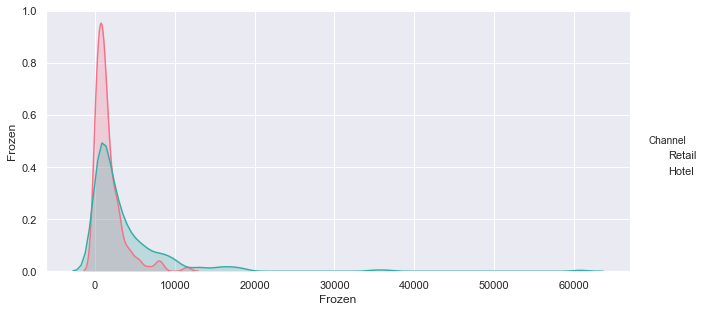

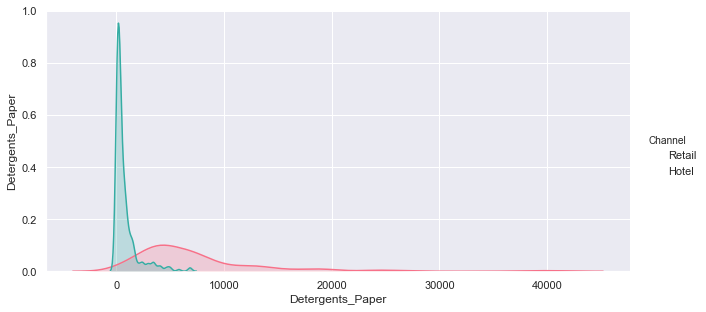

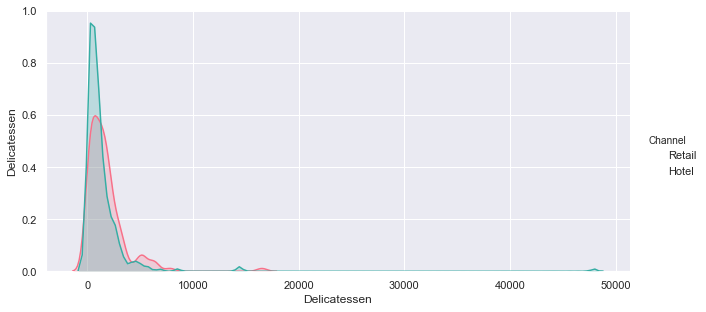

In [33]:
sns.pairplot(df1_2,hue = 'Channel',x_vars=['Fresh'],y_vars=['Fresh'],height=4.5,aspect=2,palette='husl')
sns.pairplot(df1_2,hue = 'Channel',x_vars=['Milk'],y_vars=['Milk'],height=4.5,aspect=2,palette='husl')
sns.pairplot(df1_2,hue = 'Channel',x_vars=['Grocery'],y_vars=['Grocery'],height=4.5,aspect=2,palette='husl')
sns.pairplot(df1_2,hue = 'Channel',x_vars=['Frozen'],y_vars=['Frozen'],height=4.5,aspect=2,palette='husl')
sns.pairplot(df1_2,hue = 'Channel',x_vars=['Detergents_Paper'],y_vars=['Detergents_Paper'],height=4.5,aspect=2,palette='husl')
sns.pairplot(df1_2,hue = 'Channel',x_vars=['Delicatessen'],y_vars=['Delicatessen'],height=4.5,aspect=2,palette='husl')

Purpule color = Retail and Blue color = Hotel

For Item Fresh behaviour across channel: As we can see in the graph that most buyers are spending across the channel is varying from 6k to 10k.Hence, it can be concluded that the spending behaviour for item fresh is not similar across channels.

For Item Milk behaviour across channel: As we can see in the graph that most buyers are spending across the channel is varying the most.Hence, it can be concluded that the spending behaviour for item milk is not similar across channels.

For Item Grocery behaviour across channel: As we can see in the graph that most buyers are spending across the channel is varying the most.Hence, it can be concluded that the spending behaviour for item grocery is not similar across channels.

For Item Frozen behaviour across channel: As we can see in the graph that most buyers are spending across the channel is varying from 5k to 10k.Hence, it can be concluded that the spending behaviour for item frozen is not similar across channels.

For Item Detergents_paper behaviour across channel: As we can see in the graph that most buyers are spending across the channel is varying the most.Hence, it can be concluded that the spending behaviour for item Detergents_paper is not similar across channels.

For Item Delicatessen behaviour across channel: As we can see in the graph that most buyers are spending across the channel is varying from 6k to 9k.Hence, it can be concluded that the spending behaviour for item Delicatessen is not similar across channels.

#### Conclusion: All the items are failed to have similar behaviour across the channels.

--------------------------------------------END OF PROBLEM 1.2----------------------------------------------------------

### 1.3. On the basis of the descriptive measure of variability, which item shows the most inconsistent behaviour?
### Which items shows the least inconsistent behaviour?

In [34]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0
Total_spend,440.0,33226.136364,26356.301730,904.0,17448.75,27492.0,41307.50,199891.0


In [35]:
##Fresh Item Measure of variability

Mean_Fresh = df['Fresh'].mean()
Range_Fresh = df['Fresh'].max() - df['Fresh'].min()
Std_Fresh = df['Fresh'].std()
cv_fresh = df['Fresh'].std()/df['Fresh'].mean()

print('Measure of variability for fresh item are:')
print('1. Mean:' ,Mean_Fresh)
print('2. Range:' ,Range_Fresh)
print('3. Standard Deviation:' ,Std_Fresh)
print('4. Coefficient of variation:' ,"{:.2%}".format(cv_fresh))

Measure of variability for fresh item are:
1. Mean: 12000.297727272728
2. Range: 112148
3. Standard Deviation: 12647.328865076894
4. Coefficient of variation: 105.39%


In [36]:
##Milk Item Measure of variability

Mean_Milk = df['Milk'].mean()
Range_Milk = df['Milk'].max() - df['Milk'].min()
Std_Milk = df['Milk'].std()
cv_Milk = df['Milk'].std()/df['Milk'].mean()

print('Measure of variability for Milk item are:')
print('1. Mean:' ,Mean_Milk)
print('2. Range:' ,Range_Milk)
print('3. Standard Deviation:' ,Std_Milk)
print('4. Coefficient of variation:' ,"{:.2%}".format(cv_Milk))

Measure of variability for Milk item are:
1. Mean: 5796.265909090909
2. Range: 73443
3. Standard Deviation: 7380.377174570843
4. Coefficient of variation: 127.33%


In [37]:
##Grocery Item Measure of variability

Mean_Grocery = df['Grocery'].mean()
Range_Grocery = df['Grocery'].max() - df['Grocery'].min()
Std_Grocery = df['Grocery'].std()
cv_Grocery = df['Grocery'].std()/df['Grocery'].mean()

print('Measure of variability for Grocery item are:')
print('1. Mean:' ,Mean_Grocery)
print('2. Range:' ,Range_Grocery)
print('3. Standard Deviation:' ,Std_Grocery)
print('4. Coefficient of variation:' ,"{:.2%}".format(cv_Grocery))

Measure of variability for Grocery item are:
1. Mean: 7951.277272727273
2. Range: 92777
3. Standard Deviation: 9503.162828994346
4. Coefficient of variation: 119.52%


In [38]:
##Frozen Item Measure of variability

Mean_Frozen = df['Frozen'].mean()
Range_Frozen = df['Frozen'].max() - df['Frozen'].min()
Std_Frozen = df['Frozen'].std()
cv_Frozen = df['Frozen'].std()/df['Frozen'].mean()

print('Measure of variability for Frozen item are:')
print('1. Mean:' ,Mean_Frozen)
print('2. Range:' ,Range_Frozen)
print('3. Standard Deviation:' ,Std_Frozen)
print('4. Coefficient of variation:' ,"{:.2%}".format(cv_Frozen))

Measure of variability for Frozen item are:
1. Mean: 3071.931818181818
2. Range: 60844
3. Standard Deviation: 4854.673332592367
4. Coefficient of variation: 158.03%


In [39]:
##Detergents_Paper Item Measure of variability

Mean_DP = df['Detergents_Paper'].mean()
Range_DP = df['Detergents_Paper'].max() - df['Detergents_Paper'].min()
Std_DP = df['Detergents_Paper'].std()
cv_DP = df['Detergents_Paper'].std()/df['Detergents_Paper'].mean()

print('Measure of variability for Detergents Paper item are:')
print('1. Mean:' ,Mean_DP)
print('2. Range:' ,Range_DP)
print('3. Standard Deviation:' ,Std_DP)
print('4. Coefficient of variation:' ,"{:.2%}".format(cv_DP))

Measure of variability for Detergents Paper item are:
1. Mean: 2881.4931818181817
2. Range: 40824
3. Standard Deviation: 4767.8544479042
4. Coefficient of variation: 165.46%


In [40]:
##Delicatessen Item Measure of variability

Mean_Delicatessen = df['Delicatessen'].mean()
Range_Delicatessen = df['Delicatessen'].max() - df['Delicatessen'].min()
Std_Delicatessen = df['Delicatessen'].std()
cv_Delicatessen = df['Delicatessen'].std()/df['Delicatessen'].mean()

print('Measure of variability for Delicatessen item are:')
print('1. Mean:' ,Mean_Delicatessen)
print('2. Range:' ,Range_Delicatessen)
print('3. Standard Deviation:' ,Std_Delicatessen)
print('4. Coefficient of variation:' ,"{:.2%}".format(cv_Delicatessen))

Measure of variability for Delicatessen item are:
1. Mean: 1524.8704545454545
2. Range: 47940
3. Standard Deviation: 2820.1059373693975
4. Coefficient of variation: 184.94%


In [41]:
data_behaviour = [['Fresh',"{:.2%}".format(cv_fresh)],['Milk',"{:.2%}".format(cv_Milk)],['Grocery',"{:.2%}".format(cv_Grocery)]
                  ,['Frozen',"{:.2%}".format(cv_Frozen)],['Detergents Paper',"{:.2%}".format(cv_DP)]
                  ,['Delicatessen',"{:.2%}".format(cv_Delicatessen)]]
df_behaviour = pd.DataFrame(data_behaviour,columns=['Items','Coeffficient of variation'])
df_behaviour

,Items,Coeffficient of variation
0,Fresh,105.39%
1,Milk,127.33%
2,Grocery,119.52%
3,Frozen,158.03%
4,Detergents Paper,165.46%
5,Delicatessen,184.94%


#### Conclusion : We can see all the items have dispersion in the data but based on the coefficient variance we can conclude that
    
         Most inconsistent behaviour found in item Delicatessen
    
         Least inconsistent behaviur found in item Fresh

--------------------------------------------END OF PROBLEM 1.3----------------------------------------------------------

### 1.4. Are there any outliers in the data?

There are 2 common ways through we can find out where the numerical variables have the outliers or not?

1. Z Score
2. BOX plot

let's perform these for given numerical variables

mean of fresh item is 12000.297727272728
std. deviation of fresh item is 12647.328865076894
outliers in fresh item are [56159, 56082, 76237, 112151, 56083, 53205, 68951]


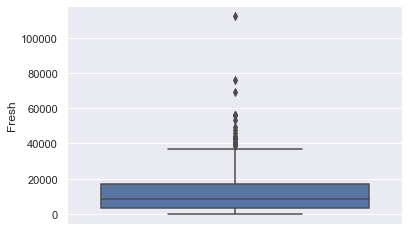

In [42]:
## Fresh item

## 1. Z score
data = df['Fresh'] 
mean = df['Fresh'].mean()
std = df['Fresh'].std() 
print('mean of fresh item is', mean) 
print('std. deviation of fresh item is', std) 

threshold1 = 3
threshold2 = -3
outlier = [] 
for i in data: 
    z = (i-mean)/std 
    if z > threshold1 or z < threshold2: 
        outlier.append(i) 
               
print('outliers in fresh item are', outlier) 

## 2. Box plot
sns.boxplot(df['Fresh'],orient = 'v')

mean of milk item is 5796.265909090909
std. deviation of milk item is 7380.377174570843
outliers in milk item are [36423, 54259, 29892, 38369, 46197, 73498, 29627, 43950, 28326]


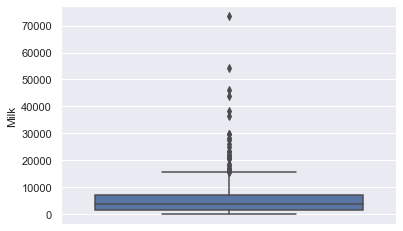

In [43]:
## Milk item

## 1. Z score
data = df['Milk'] 
mean = df['Milk'].mean()
std = df['Milk'].std() 
print('mean of milk item is', mean) 
print('std. deviation of milk item is', std) 

threshold1 = 3
threshold2 = -3
outlier = [] 
for i in data: 
    z = (i-mean)/std 
    if z > threshold1 or z < threshold2: 
        outlier.append(i) 
               
print('outliers in milk item are', outlier) 

## 2. Box plot
sns.boxplot(df['Milk'],orient = 'v')

mean of grocery item is 7951.277272727273
std. deviation of grocery item is 9503.162828994346
outliers in grocery item are [55571, 59598, 45828, 92780, 39694, 36486, 67298]


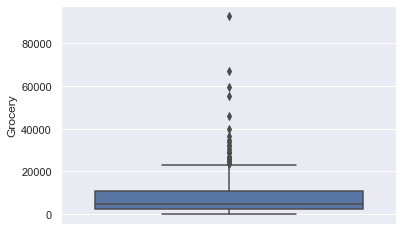

In [44]:
## Grocery item

## 1. Z score
data = df['Grocery'] 
mean = df['Grocery'].mean()
std = df['Grocery'].std() 
print('mean of grocery item is', mean) 
print('std. deviation of grocery item is', std) 

threshold1 = 3
threshold2 = -3
outlier = [] 
for i in data: 
    z = (i-mean)/std 
    if z > threshold1 or z < threshold2: 
        outlier.append(i) 
               
print('outliers in grocery item are', outlier) 

## 2. Box plot
sns.boxplot(df['Grocery'],orient = 'v')

mean of frozen item is 3071.931818181818
std. deviation of frozen item is 4854.673332592367
outliers in frozen item are [35009, 18028, 36534, 18711, 60869, 17866]


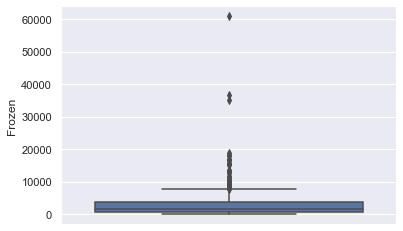

In [45]:
## Frozen item

## 1. Z score
data = df['Frozen'] 
mean = df['Frozen'].mean()
std = df['Frozen'].std() 
print('mean of frozen item is', mean) 
print('std. deviation of frozen item is', std) 

threshold1 = 3
threshold2 = -3
outlier = [] 
for i in data: 
    z = (i-mean)/std 
    if z > threshold1 or z < threshold2: 
        outlier.append(i) 
               
print('outliers in frozen item are', outlier) 

## 2. Box plot
sns.boxplot(df['Frozen'],orient = 'v')

mean of detergent paper item is 2881.4931818181817
std. deviation of detergent paper item is 4767.8544479042
outliers in detergent paper item are [24171, 17740, 26701, 24231, 40827, 20070, 18906, 19410, 18594, 38102]


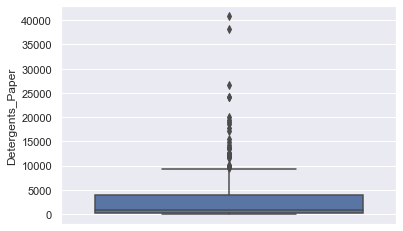

In [46]:
## Detergents Paper item

## 1. Z score
data = df['Detergents_Paper'] 
mean = df['Detergents_Paper'].mean()
std = df['Detergents_Paper'].std() 
print('mean of detergent paper item is', mean) 
print('std. deviation of detergent paper item is', std) 

threshold1 = 3
threshold2 = -3
outlier = [] 
for i in data: 
    z = (i-mean)/std 
    if z > threshold1 or z < threshold2: 
        outlier.append(i) 
               
print('outliers in detergent paper item are', outlier) 

## 2. Box plot
sns.boxplot(df['Detergents_Paper'],orient = 'v')

mean of delicatessen item is 1524.8704545454545
std. deviation of delicatessen item is 2820.1059373693975
outliers in delicatessen item are [16523, 14472, 14351, 47943]


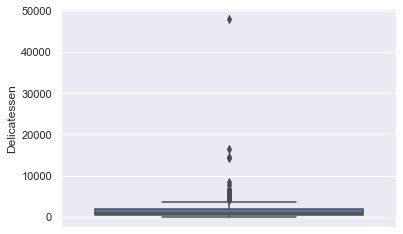

In [47]:
## Delicatessen item

## 1. Z score
data = df['Delicatessen'] 
mean = df['Delicatessen'].mean()
std = df['Delicatessen'].std() 
print('mean of delicatessen item is', mean) 
print('std. deviation of delicatessen item is', std) 

threshold1 = 3
threshold2 = -3
outlier = [] 
for i in data: 
    z = (i-mean)/std 
    if z > threshold1 or z < threshold2: 
        outlier.append(i) 
               
print('outliers in delicatessen item are', outlier) 

## 2. Box plot
sns.boxplot(df['Delicatessen'],orient = 'v')

#### Conculsion : As both the approach stats that all the numerical variables have the outliers in the data.

--------------------------------------------END OF PROBLEM 1.4----------------------------------------------------------

### 1.5. On the basis of this report, what are the recommendations?

The data set shows clear difference in spending over the six items across regions and across the given channels. For instance, the region ‘other’ sees the maximum amount spent on all items and in that region ‘hotel’ is the channel that accounts for majority amount spent on all items.  It is safe to infer that out of the three regions, Lisbon, Oporto, and Other, the region ‘other’ spends the most on the items. On the other hand, out of the two channels in place, spending on items is the most through ‘Hotel.’ 

To conclude our recommendation, we have bifurcated into 2 categories:

•	Business oriented recommendations      
•	Data facts oriented recommendations    

Business oriented recommendations:

Based on these observations we recommend a root cause analysis by the wholesale retailer. We should study the regions showing a comparatively lower spending behavior, i.e Oporto and Lisbon. There can be multiple reasons for the difference spending behavior. It can be as simple as the fact that region ‘other’ is comparatively densely populated. If this is the case then to induce more spending the retailer will have to supply more quantity.
The other more complex reasons can be the difference in the ratio of working population, disposable income, average age of the residents etc.       

Factors like age, working population or older residents, disposable income etc. also plays a role in determining the channel through with money is spent on these items. For example if majority of people in the region are young of working age and have comparatively higher disposable income then in that region spending on items can be comparatively more. Also in such a social set up spending on these items can be more through ‘hotel’ than through a ‘Retail’ channel, simply because young, working people with more money in hand to spend stay out of their homes most of the times, eat out more, cook less thereby consuming less of these items through a retail outlet.  

The wholesale retailer will have to draw these and many such inferences and come up with a plan to boost sales/expenditure on items in a region which currently shows less spending and through channel that is performing badly.
The wholesaler can provide discounts on items, different offers to make them look more affordable, if spending is an issue in a particular region, or add in a reward offer on the purchase of the item.   

 The wholesaler can continue to direct more quantity towards the channel and the region that brings in more revenue at the same time look at ways to attract more buyers in regions and through channels that are currently performing poorly.

Data facts oriented recommendations:

Sometimes it’s best to keep outliers in the dataset as they might capture valuable insights. Retaining these points can be hard, particularly when it reduces statistical significance! However, excluding extreme values solely due to their extremeness can distort the results by removing information about the variability inherent in the dataset. When considering whether to remove an outlier, we need to evaluate if it appropriately reflects our target population, buyers, items, region, channel and methodology around the same.

Did anything unusual happen while measuring these observations, such as focusing on specific region or channel or buyer or items.

If the outlier in question is:

•	A measurement error or data entry error correct the error if possible. If we can’t fix it, remove that observation because we know it’s incorrect.    
•	When we decide to remove outliers, we need to document the excluded data points and explain your reasoning.   
•	We must be able to attribute a specific cause for removing outliers.   
•	Another approach is to perform the analysis with and without these observations and discuss the differences. Comparing results in this manner is particularly useful when we are unsure about removing an outlier and when there is substantial disagreement within the dataset.

--------------------------------------------END OF PROBLEM 1.5----------------------------------------------------------